In [8]:
!python --version


Python 3.13.5


In [10]:
pip help install


Usage:   
  C:\Users\tanis\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\tanis\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\tanis\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\tanis\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\tanis\anaconda3\python.exe -m pip install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Options:
  -r, --requirement <file>    Install from the given requirements file. This
                              option can be used multiple times.
  -

In [6]:
!python -m pip install pipeline

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pipeline (from versions: none)
ERROR: No matching distribution found for pipeline


PROBLEM STATEMENT:

Build a machine learning model that predicts employee salaries based on multiple features like job title, experience, education, location, etc., using data from Kaggle. Implement ensemble techniques such as Random Forest, Gradient Boosting, and Voting Classifiers to improve accuracy.

DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV



In [4]:
data=pd.read_csv("C:/Users/tanis/Desktop/Employees.csv")


In [5]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04-04-2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,21-05-2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,28-09-2017,8,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,14-08-2018,7,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,11-03-2020,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [6]:
data.dtypes

No                  int64
First Name         object
Last Name          object
Gender             object
Start Date         object
Years               int64
Department         object
Country            object
Center             object
Monthly Salary      int64
Annual Salary       int64
Job Rate          float64
Sick Leaves         int64
Unpaid Leaves       int64
Overtime Hours      int64
dtype: object

######INFORMATION#####

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              689 non-null    int64  
 1   First Name      689 non-null    object 
 2   Last Name       689 non-null    object 
 3   Gender          689 non-null    object 
 4   Start Date      689 non-null    object 
 5   Years           689 non-null    int64  
 6   Department      689 non-null    object 
 7   Country         689 non-null    object 
 8   Center          689 non-null    object 
 9   Monthly Salary  689 non-null    int64  
 10  Annual Salary   689 non-null    int64  
 11  Job Rate        689 non-null    float64
 12  Sick Leaves     689 non-null    int64  
 13  Unpaid Leaves   689 non-null    int64  
 14  Overtime Hours  689 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 80.9+ KB


In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
684    False
685    False
686    False
687    False
688    False
Length: 689, dtype: bool

In [9]:
data.duplicated().shape

(689,)

In [10]:
data1=data.drop_duplicates(keep='first')


In [11]:
data.shape

(689, 15)

In [12]:
data1.shape

(689, 15)

In [13]:
data.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [14]:
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04-04-2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,21-05-2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,28-09-2017,8,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.head(3).shape

(3, 15)

DATA EXPLORATION AND VISUALIZATION

In [17]:
data.describe()

,No,Years,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,345.000000,6.249637,2068.201742,24818.420900,3.586357,1.609579,0.759071,13.702467
std,199.041453,1.262762,763.289240,9159.470878,1.350125,2.196051,1.647764,25.692049
min,1.000000,4.000000,703.000000,8436.000000,1.000000,0.000000,0.000000,0.000000
25%,173.000000,5.000000,1436.000000,17232.000000,3.000000,0.000000,0.000000,3.000000
50%,345.000000,6.000000,2077.000000,24924.000000,3.000000,0.000000,0.000000,7.000000
75%,517.000000,7.000000,2682.000000,32184.000000,5.000000,3.000000,0.000000,10.000000
max,689.000000,9.000000,3450.000000,41400.000000,5.000000,6.000000,6.000000,198.000000


In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

CORRELATION MATRIX AMONG NUMERICAL FEATURES:

In [20]:
corr=data1[['No','Years','Monthly Salary','Annual Salary','Job Rate']].corr()
corr

,No,Years,Monthly Salary,Annual Salary,Job Rate
No,1.000000,-0.019361,0.012266,0.012266,-0.004941
Years,-0.019361,1.000000,-0.049539,-0.049539,0.032948
Monthly Salary,0.012266,-0.049539,1.000000,1.000000,-0.041030
Annual Salary,0.012266,-0.049539,1.000000,1.000000,-0.041030
Job Rate,-0.004941,0.032948,-0.041030,-0.041030,1.000000


<Axes: >

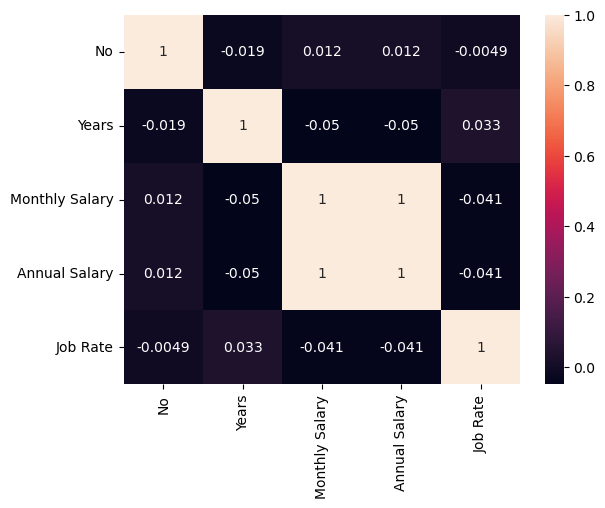

In [21]:
sns.heatmap(corr,annot=True)

DATA VISUALIZATION-BAR CHART,BOX PLOT,HISTOGRAM

In [22]:
data1['Department'].value_counts()

Department
Manufacturing                  140
Quality Control                 89
Account Management              84
Quality Assurance               67
Facilities/Engineering          58
Marketing                       48
IT                              40
Product Development             34
Sales                           20
Creative                        19
Training                        16
Professional Training Group     14
Environmental Compliance        13
Environmental Health/Safety      9
Green Building                   8
Major Mfg Projects               8
Human Resources                  7
Manufacturing Admin              5
Research/Development             5
Research Center                  5
Name: count, dtype: int64

<Axes: xlabel='Department'>

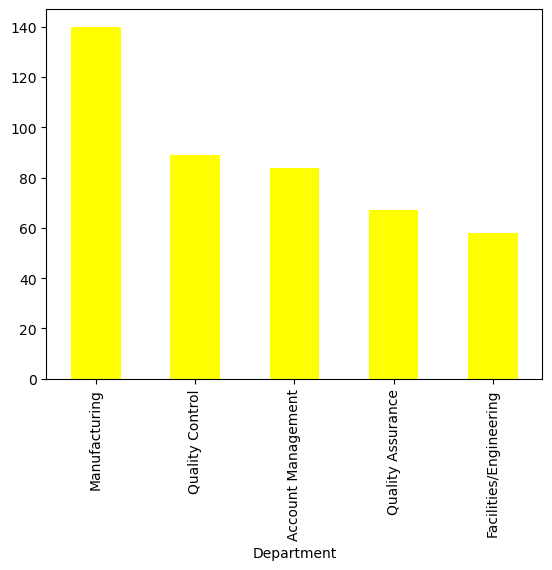

In [23]:
data1['Department'].value_counts().head().plot(kind='bar',color='yellow')

In [24]:
data1['Annual Salary'].value_counts()

Annual Salary
24108    3
26160    3
37656    3
30504    2
16872    2
        ..
9744     1
33072    1
15444    1
17532    1
31272    1
Name: count, Length: 613, dtype: int64

<Axes: ylabel='count'>

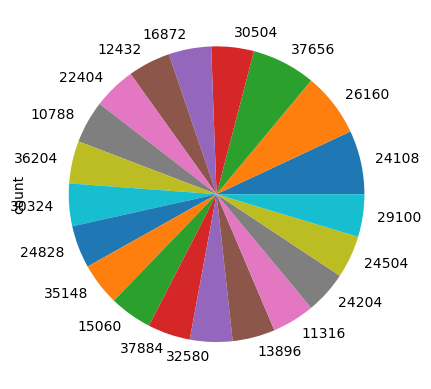

In [25]:
data['Annual Salary'].value_counts().head(20).plot(kind='pie')

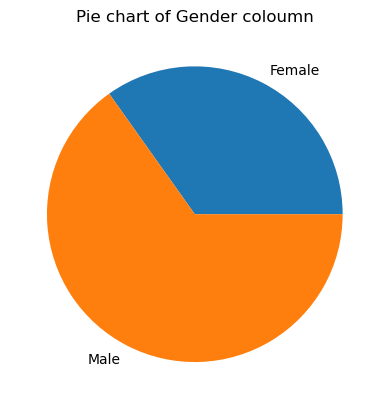

In [26]:
data["Gender"].value_counts().sort_values(ascending = True).plot(kind="pie")
plt.title("Pie chart of Gender coloumn")
plt.ylabel("")
plt.show()

In [27]:
data.head(2)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04-04-2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,21-05-2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198


<Axes: ylabel='Frequency'>

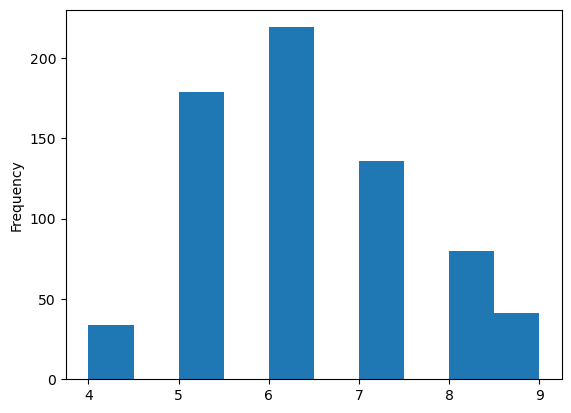

In [28]:
data['Years'].plot(kind='hist')	

BOX-PLOTTING


<Axes: >

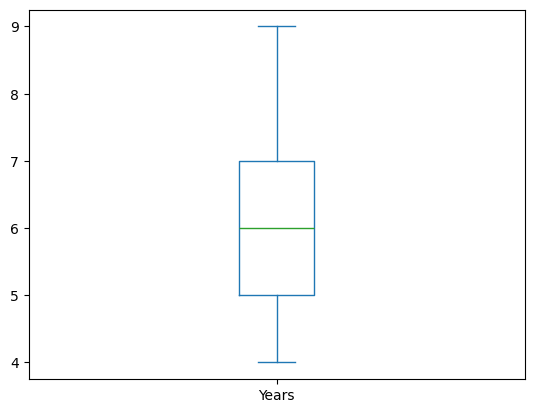

In [29]:
data.Years.plot(kind='box')	

<Axes: >

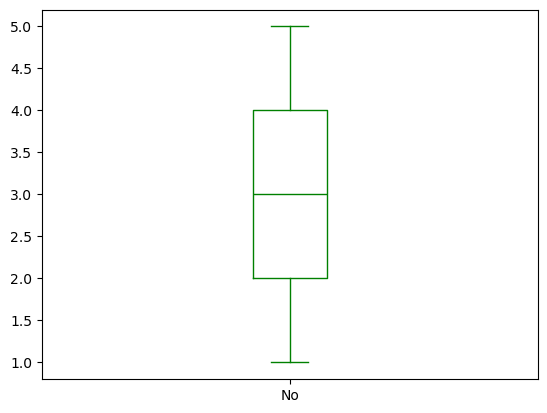

In [30]:
data.No.head().plot(kind='box',color='green')	

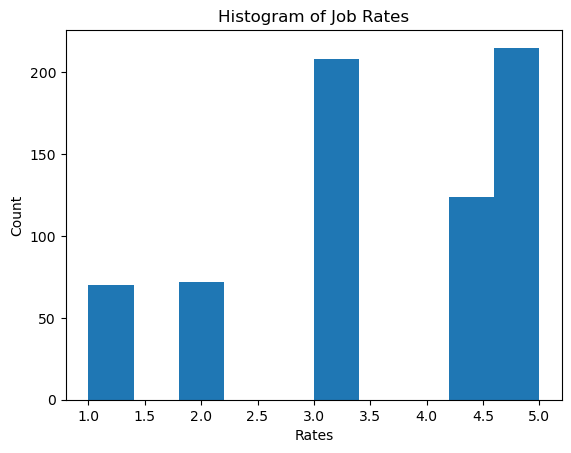

In [31]:
plt.hist(data["Job Rate"])
plt.title("Histogram of Job Rates")
plt.xlabel("Rates")
plt.ylabel("Count")

plt.show()

In [32]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

In [33]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04-04-2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,21-05-2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,28-09-2017,8,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,14-08-2018,7,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,11-03-2020,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


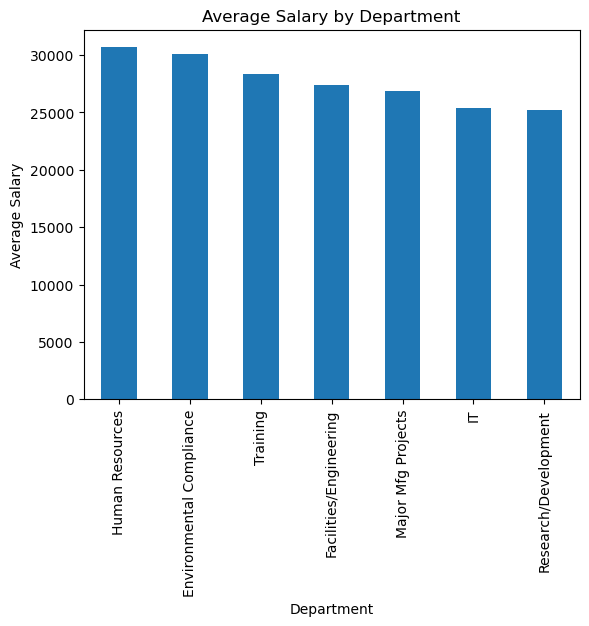

In [34]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending =False).head(7).plot(kind="bar")
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

In [35]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending =False)


Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [36]:
data.head(2)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04-04-2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,21-05-2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198


In [37]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

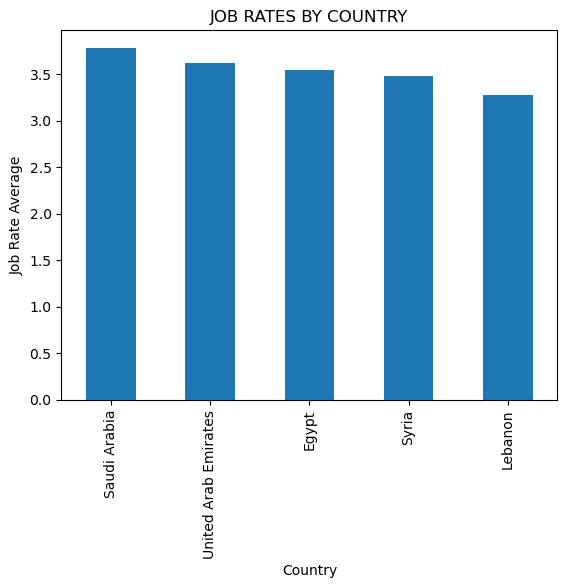

In [38]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Job Rate Average")
plt.title("JOB RATES BY COUNTRY")
plt.show()

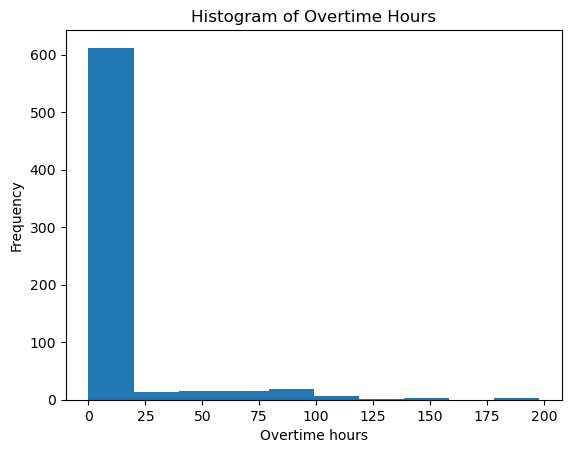

In [39]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Overtime hours")
plt.ylabel("Frequency")
plt.show()

In [40]:
data["Overtime Hours"].describe()

count    689.000000
mean      13.702467
std       25.692049
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max      198.000000
Name: Overtime Hours, dtype: float64

In [41]:
data["Annual Salary"].describe()

count      689.000000
mean     24818.420900
std       9159.470878
min       8436.000000
25%      17232.000000
50%      24924.000000
75%      32184.000000
max      41400.000000
Name: Annual Salary, dtype: float64

In [42]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [43]:
import sklearn

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd
x=data[['Years','Job Rate']]
y=data['Annual Salary']


In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

Random Forest Mean Squared Error: 93865555.41708012
Random Forest R-squared: -0.0692058809392877


GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting R-squared: {gb_r2}")

Gradient Boosting Mean Squared Error: 92715900.64393108
Gradient Boosting R-squared: -0.05611036747815712


VotingRegressor


In [58]:
from sklearn.ensemble import VotingRegressor

# Initialize the individual models
estimators = [('rf', rf_model), ('gb', gb_model)]

# Initialize the Voting Regressor
voting_model = VotingRegressor(estimators=estimators)

# Train the Voting Regressor
voting_model.fit(X_train, y_train)

# Make predictions on the test set
voting_predictions = voting_model.predict(X_test)

# Evaluate the model
voting_mse = mean_squared_error(y_test, voting_predictions)
voting_r2 = r2_score(y_test, voting_predictions)

print(f"Voting Regressor Mean Squared Error: {voting_mse}")
print(f"Voting Regressor R-squared: {voting_r2}")

Voting Regressor Mean Squared Error: 93219797.1901309
Voting Regressor R-squared: -0.061850163595997154


In [59]:
len(y_train)

551

In [60]:
len(X_test)

138

In [61]:
x

,Years,Job Rate
0,7,3.0
1,5,1.0
2,8,2.0
3,7,3.0
4,5,5.0
...,...,...
684,5,2.0
685,5,3.0
686,8,5.0
687,7,3.0


MODEL Development :

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr=LinearRegression()

MODEL TRAINING :

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

MODEL PREDICTION :

In [65]:
predslr=lr.predict(X_test)

MOLDEL EVALUATION:

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mean_absolute_error(predslr,y_test)

8303.70145587091

In [68]:
import joblib

file=open('linear.pkl','wb')
joblib.dump(lr,"linearmodel.pkl")

['linearmodel.pkl']